## Chapter 4
# Whistler Data

In [1]:
import sys
import os
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
# import python library
sys.path.append(os.path.join(os.getcwd().split(os.environ.get('USER'))[0],os.environ.get('USER'), 'wdml', 'py'))

from sample import Sample
from dataset import Dataset
from database import Database
from sample_detector import SampleDetector

dataset_loc = os.path.join(os.getcwd().split(os.environ.get('USER'))[0],os.environ.get('USER'), 'wdml', 'data','datasets', 'awdEvents1')
database_loc = os.path.join(os.getcwd().split(os.environ.get('USER'))[0],os.environ.get('USER'), 'wdml', 'data','databases', 'awdEvents1')
site = 'marion'
dataset = Dataset(dataset_loc, site)
database = Database(dataset_loc, database_loc, site)

## 4.2 Pre-Processing
### 4.2.1 Signal to Noise Ratio

(array([[ 2.5, 54. ],
       [ 2.9, 76. ],
       [ 3. , 77. ]]), array([[390,  54],
       [453,  76],
       [469,  77]]))
(array([[ 12,  64, 353, 477],
       [ 12,  64, 416, 540],
       [ 12,  64, 432, 556]]), 3, 3)


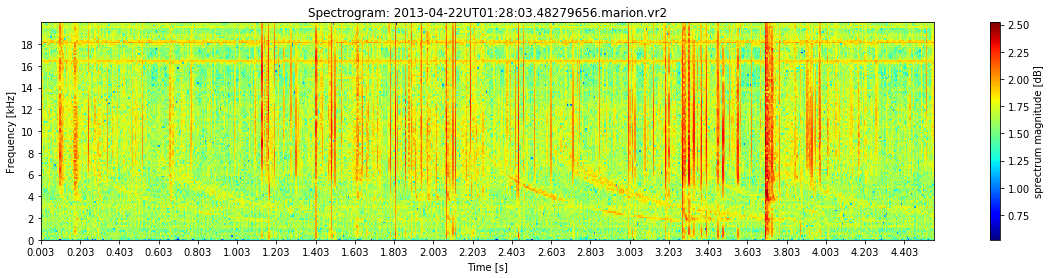

SNR = 1.048 dB


In [32]:
file = np.random.choice(database.get_samples(),1)[0]
# file = '2013-07-19UT01:01:39.12931914.marion.vr2'
# file = '2013-10-08UT02:02:10.20979430.marion.vr2'
file = '2013-04-22UT01:28:03.48279656.marion.vr2'
# file = '2013-07-04UT19:27:45.49091930.marion.vr2'
# print('Train:' if file in database.get_train() else 'Test:', file)
sample = SampleDetector(dataset_loc, site,file)

freq_range, time_err=[2,10],0.1
# print(sample.output())
print(sample.awda_whistlers(time_err=time_err))
print(sample.cuts(cut_freq=freq_range[1]-freq_range[0], cut_freq_min=freq_range[0], time_err=time_err, noise=False))
freq_size = 4
size = (freq_size*sample.get_time_freq_ratio(dec=2), freq_size)
scale_mean,scale_std,scale = 1.448, 0.268, 4
sample.apply_min_max_scale(scale_mean-scale*scale_std,scale_mean+scale*scale_std)
sample.spectrogram_plot(figsize=size, xlabel='Time [s]', ylabel='Frequency [kHz]',zlabel='sprectrum magnitude [dB]', 
                           xaxis=True, yaxis=True, ticks=[0.2,2],
                           title="Spectrogram: "+sample.get_file(), cmap='jet', cmap_show=True)
print('SNR = %.3f dB'%sample.snr())

### 4.2.2 Preprocessing Visualisation

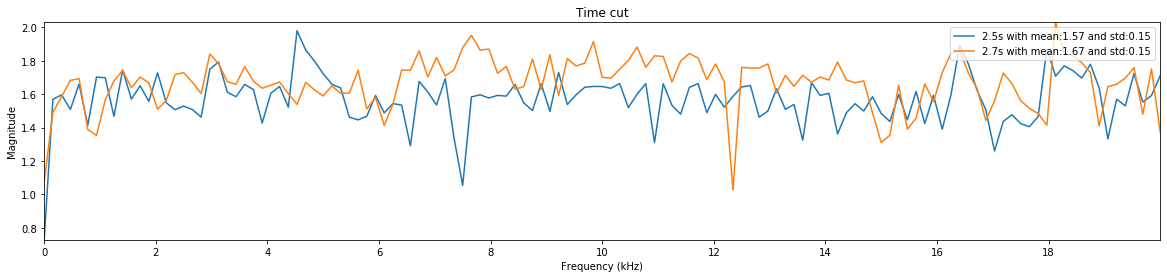

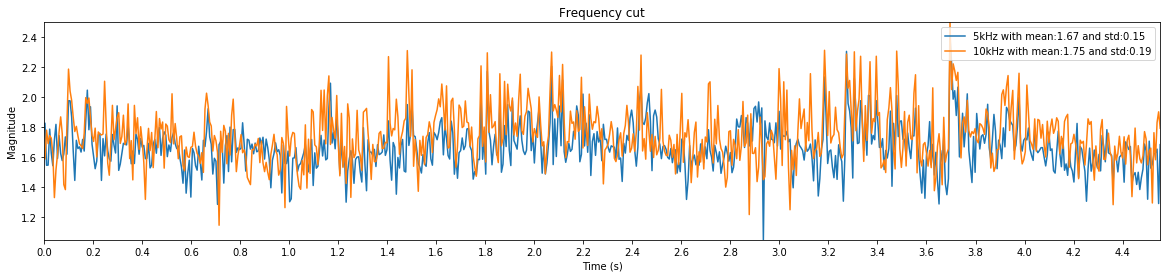

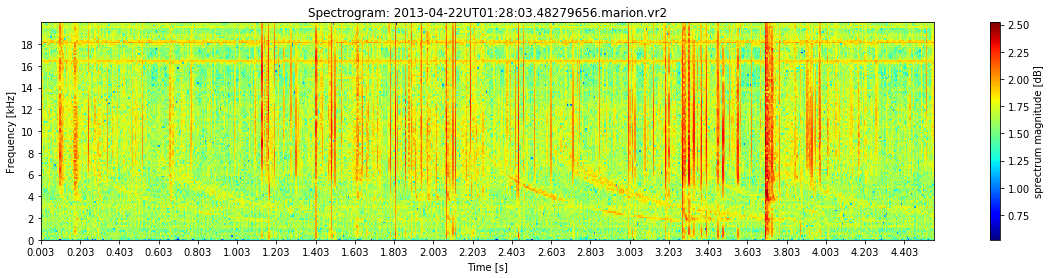

SNR = 1.048 dB


In [33]:
time = [2.5,2.7]
freq = [5,10]
sample.spectrogram_with_axis()
scale_mean,scale_std,scale = 1.448, 0.268, 4
sample.apply_min_max_scale(scale_mean-scale*scale_std,scale_mean+scale*scale_std)
_ = sample.spectrogram_time_cut_plot(time=time, figsize=size, title='Time cut', legend=[str(t)+'s' for t in time], stats=True, legend_loc='upper right')
_ = sample.spectrogram_freq_cut_plot(freq=freq, figsize=size, title='Frequency cut', legend=[str(f)+'kHz' for f in freq], stats=True, legend_loc='upper right')
sample.spectrogram_plot(figsize=size, xlabel='Time [s]', ylabel='Frequency [kHz]',zlabel='sprectrum magnitude [dB]', 
                           xaxis=True, yaxis=True, ticks=[0.2,2],
                           title="Spectrogram: "+sample.get_file(), cmap='jet', cmap_show=True)
print('SNR = %.3f dB'%sample.snr())

### 4.2.3 Z Score Transform

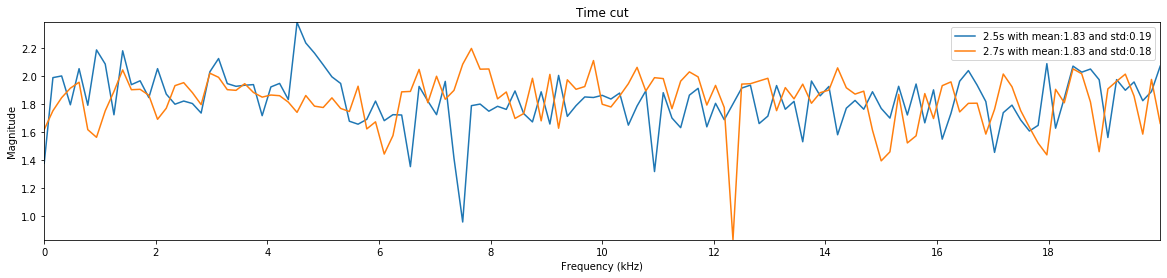

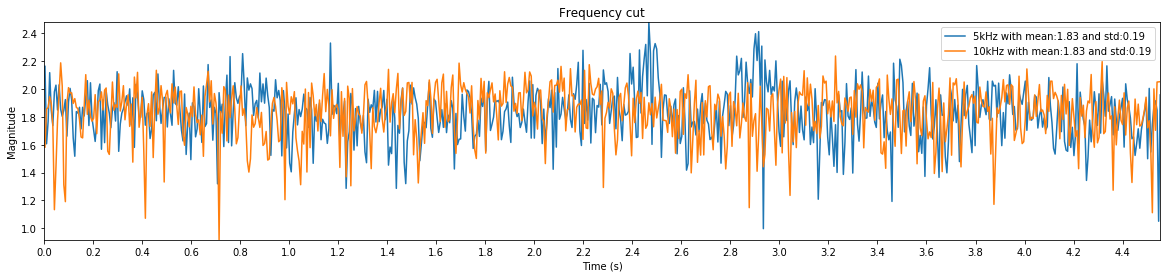

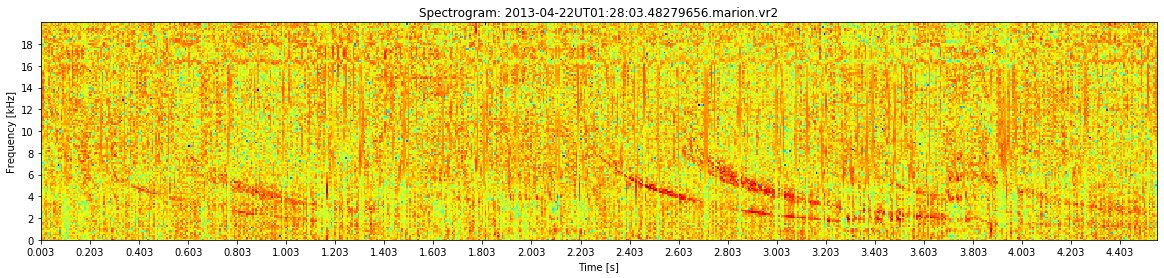

SNR = 1.219dB, Improv = 0.170dB


In [34]:
sample.spectrogram_with_axis()
scale_mean,scale_std,scale = 1.448, 0.268, 4
sample.apply_min_max_scale(scale_mean-scale*scale_std,scale_mean+scale*scale_std)
snr_default = sample.snr()
sample.apply_zscore()
scale_mean,scale_std,scale = 1.448, 0.268, 4
sample.apply_min_max_scale(scale_mean-scale*scale_std,scale_mean+scale*scale_std)
_ = sample.spectrogram_time_cut_plot(time=time, figsize=size, title='Time cut', legend=[str(t)+'s' for t in time], stats=True, legend_loc='upper right')
_ = sample.spectrogram_freq_cut_plot(freq=freq, figsize=size, title='Frequency cut', legend=[str(f)+'kHz' for f in freq], stats=True, legend_loc='upper right')
sample.spectrogram_plot(figsize=size, xlabel='Time [s]', ylabel='Frequency [kHz]',zlabel='sprectrum magnitude [dB]', 
                           xaxis=True, yaxis=True, ticks=[0.2,2],
                           title="Spectrogram: "+sample.get_file(), cmap='jet', cmap_show=False)
snr = sample.snr()
print('SNR = %.3fdB, Improv = %.3fdB'%(snr,snr-snr_default))

### 4.2.4 Detrend
#### Constant

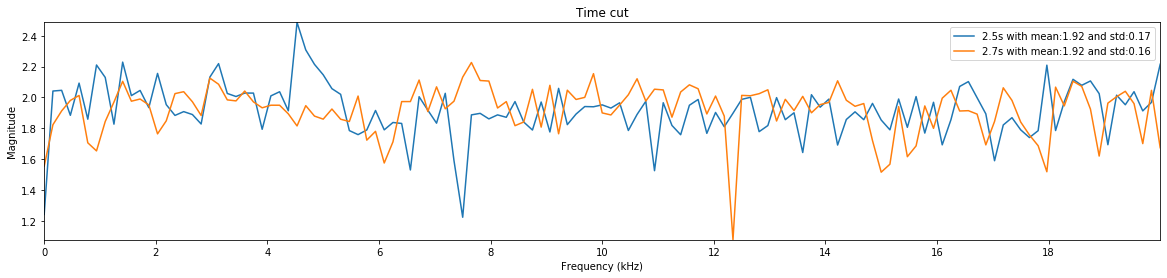

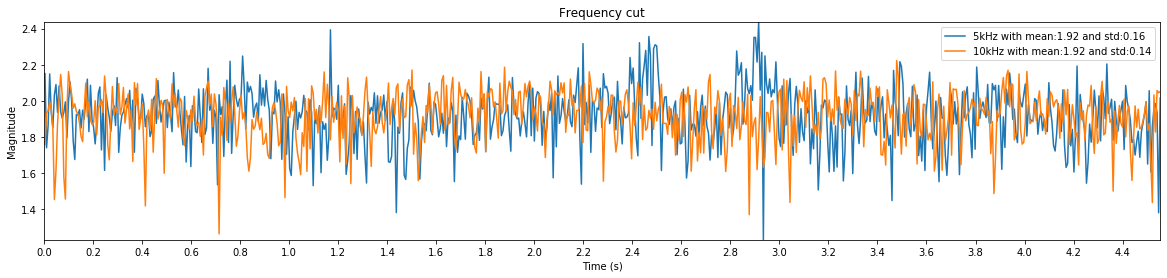

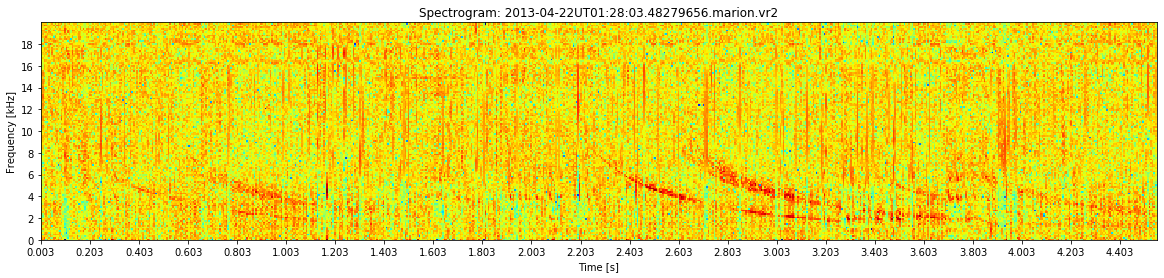

SNR = 1.166dB, Improv = 0.117dB


In [18]:
sample.spectrogram_with_axis()
scale_mean,scale_std,scale = 1.448, 0.268, 4
sample.apply_min_max_scale(scale_mean-scale*scale_std,scale_mean+scale*scale_std)
snr_default = sample.snr()
sample.apply_detrend(type='constant')
scale_mean,scale_std,scale = 1.448, 0.268, 4
sample.apply_min_max_scale(scale_mean-scale*scale_std,scale_mean+scale*scale_std)
_ = sample.spectrogram_time_cut_plot(time=time, figsize=size, title='Time cut', legend=[str(t)+'s' for t in time], stats=True, legend_loc='upper right')
_ = sample.spectrogram_freq_cut_plot(freq=freq, figsize=size, title='Frequency cut', legend=[str(f)+'kHz' for f in freq], stats=True, legend_loc='upper right')
sample.spectrogram_plot(figsize=size, xlabel='Time [s]', ylabel='Frequency [kHz]',zlabel='sprectrum magnitude [dB]', 
                           xaxis=True, yaxis=True, ticks=[0.2,2],
                           title="Spectrogram: "+sample.get_file(), cmap='jet', cmap_show=False)
snr = sample.snr()
print('SNR = %.3fdB, Improv = %.3fdB'%(snr,snr-snr_default))

#### Linear Detrending

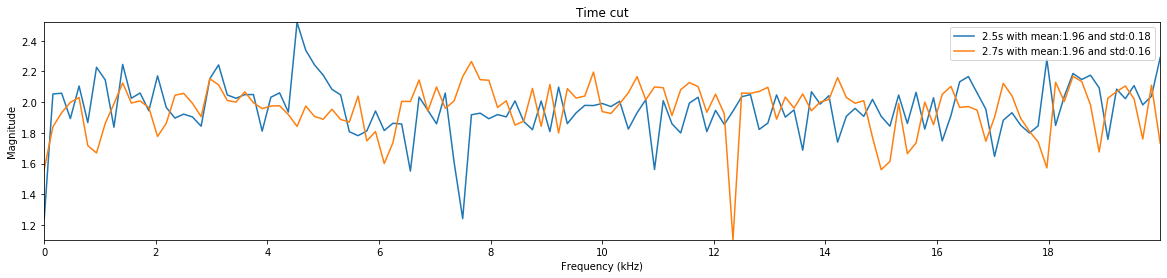

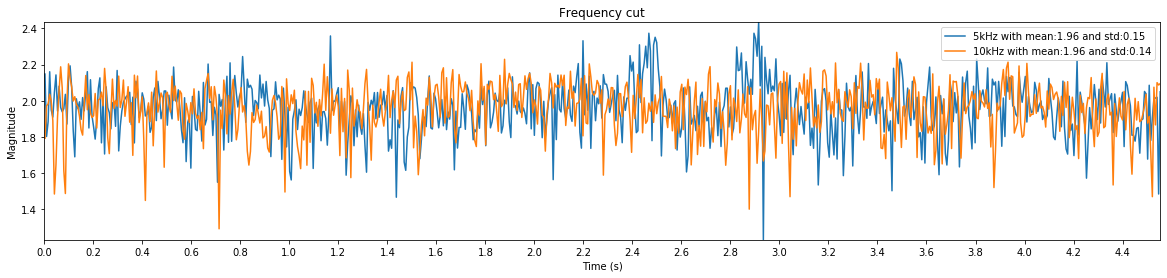

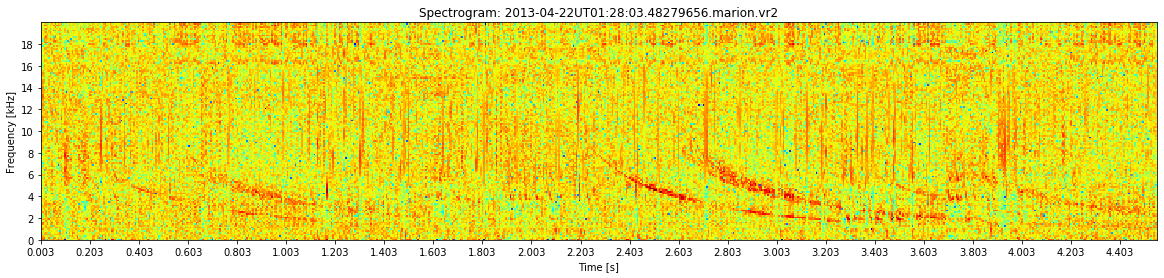

SNR = 0.903dB, Improv = -0.145dB


In [19]:
sample.spectrogram_with_axis()
scale_mean,scale_std,scale = 1.448, 0.268, 4
sample.apply_min_max_scale(scale_mean-scale*scale_std,scale_mean+scale*scale_std)
snr_default = sample.snr()
sample.apply_detrend(type='linear')
scale_mean,scale_std,scale = 1.448, 0.268, 4
sample.apply_min_max_scale(scale_mean-scale*scale_std,scale_mean+scale*scale_std)
_ = sample.spectrogram_time_cut_plot(time=time, figsize=size, title='Time cut', legend=[str(t)+'s' for t in time], stats=True, legend_loc='upper right')
_ = sample.spectrogram_freq_cut_plot(freq=freq, figsize=size, title='Frequency cut', legend=[str(f)+'kHz' for f in freq], stats=True, legend_loc='upper right')
sample.spectrogram_plot(figsize=size, xlabel='Time [s]', ylabel='Frequency [kHz]',zlabel='sprectrum magnitude [dB]', 
                           xaxis=True, yaxis=True, ticks=[0.2,2],
                           title="Spectrogram: "+sample.get_file(), cmap='jet', cmap_show=False)
snr = sample.snr()
print('SNR = %.3fdB, Improv = %.3fdB'%(snr,snr-snr_default))

#### Median Filter

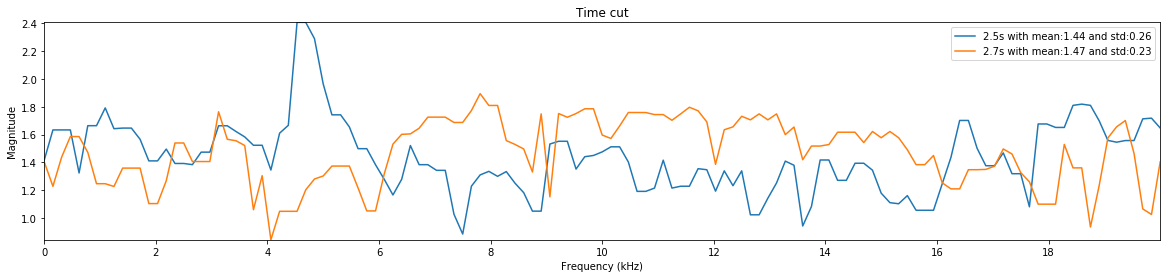

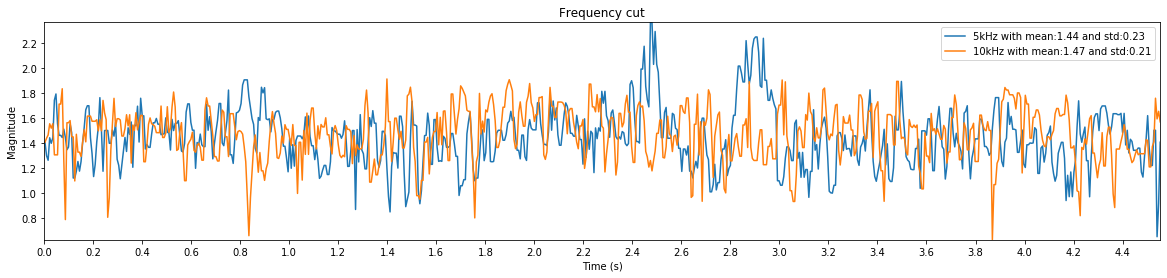

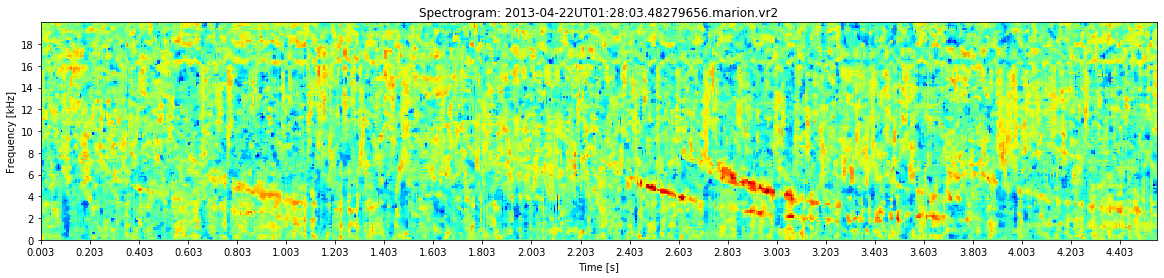

SNR = 3.343dB, 2.294dB


In [22]:
sample.spectrogram_with_axis()
scale_mean,scale_std,scale = 1.448, 0.268, 4
sample.apply_min_max_scale(scale_mean-scale*scale_std,scale_mean+scale*scale_std)
snr_default = sample.snr()
sample.apply_zscore()
snr_z = sample.snr()
sample.apply_medfilt((3,3))
scale_mean,scale_std,scale = 1.448, 0.268, 4
sample.apply_min_max_scale(scale_mean-scale*scale_std,scale_mean+scale*scale_std)
_ = sample.spectrogram_time_cut_plot(time=time, figsize=size, title='Time cut', legend=[str(t)+'s' for t in time], stats=True, legend_loc='upper right')
_ = sample.spectrogram_freq_cut_plot(freq=freq, figsize=size, title='Frequency cut', legend=[str(f)+'kHz' for f in freq], stats=True, legend_loc='upper right')
sample.spectrogram_plot(figsize=size, xlabel='Time [s]', ylabel='Frequency [kHz]',zlabel='sprectrum magnitude [dB]', 
                           xaxis=True, yaxis=True, ticks=[0.2,2],
                           title="Spectrogram: "+sample.get_file(), cmap='jet', cmap_show=False)
snr = sample.snr()
print('SNR = %.3fdB, %.3fdB'%(snr, snr-snr_default))

#### Mean Filter

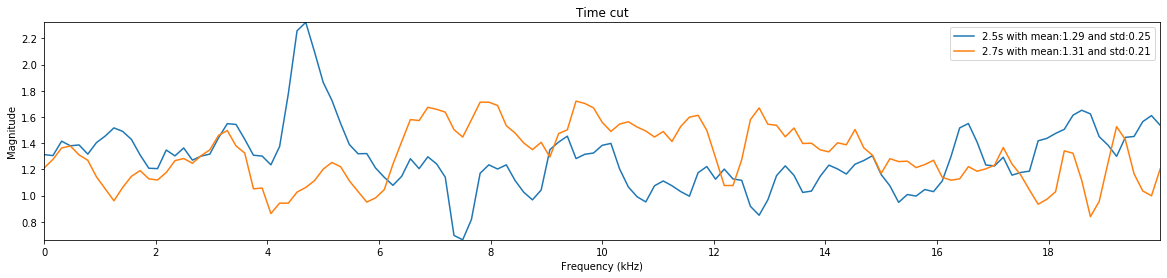

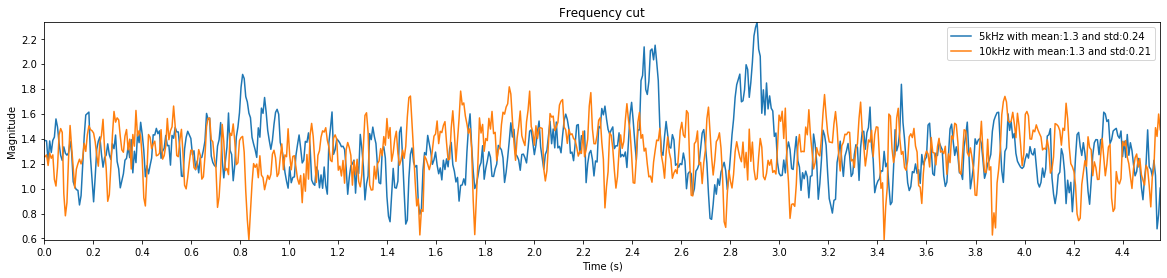

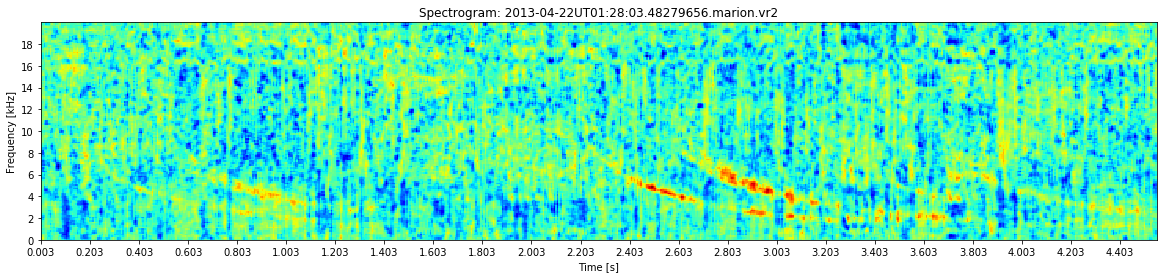

SNR = 3.942dB, 2.893dB


In [23]:
sample.spectrogram_with_axis()
scale_mean,scale_std,scale = 1.448, 0.268, 4
sample.apply_min_max_scale(scale_mean-scale*scale_std,scale_mean+scale*scale_std)
snr_default = sample.snr()
sample.apply_zscore()
snr_z = sample.snr()
sample.apply_meanfilt((3,3))
scale_mean,scale_std,scale = 1.448, 0.268, 4
sample.apply_min_max_scale(scale_mean-scale*scale_std,scale_mean+scale*scale_std)
_ = sample.spectrogram_time_cut_plot(time=time, figsize=size, title='Time cut', legend=[str(t)+'s' for t in time], stats=True, legend_loc='upper right')
_ = sample.spectrogram_freq_cut_plot(freq=freq, figsize=size, title='Frequency cut', legend=[str(f)+'kHz' for f in freq], stats=True, legend_loc='upper right')
sample.spectrogram_plot(figsize=size, xlabel='Time [s]', ylabel='Frequency [kHz]',zlabel='sprectrum magnitude [dB]', 
                           xaxis=True, yaxis=True, ticks=[0.2,2],
                           title="Spectrogram: "+sample.get_file(), cmap='jet', cmap_show=False)
snr = sample.snr()
print('SNR = %.3fdB, %.3fdB'%(snr, snr-snr_default))

### 4.2.6 Evaluation 

In [41]:
import multiprocessing as mp
def evaluate_snr(file):
    """[, snr_default, snr_zscore, snr_detrend_cst, snr_detrend_lin, snr_medfilt, snr_meanfilt]"""
    sample = Sample(dataset_loc, site, file)
    def snr(sample):
        sample.apply_min_max_scale(1.448-4*0.268,1.448+4*0.268)
        return sample.snr()
    sample.spectrogram_with_axis()
    sample.apply_detrend(type='constant')
    snr_detrend_cst = snr(sample)
    sample.spectrogram_with_axis()
    sample.apply_detrend(type='linear')
    snr_detrend_lin = snr(sample)
    sample.spectrogram_with_axis()
    snr_default = snr(sample)
    sample.apply_zscore()
    snr_zscore = snr(sample)
    sample.spectrogram_with_axis()
    sample.apply_zscore()
    sample.apply_medfilt((3,3))
    snr_medfilt = snr(sample)
    sample.spectrogram_with_axis()
    sample.apply_zscore()
    sample.apply_meanfilt((3,3))
    snr_meanfilt = snr(sample)
    return np.array([snr_default, snr_zscore, snr_detrend_cst, snr_detrend_lin, snr_medfilt, snr_meanfilt])

files = database.get_train()
results = []
pool = mp.Pool(mp.cpu_count())
# generate 1D array of all spectrogram data
for result in tqdm(pool.imap_unordered(evaluate_snr, files), total=len(files)):
    results.append(result)
pool.close()
pool.join()
results = np.array(results)

100%|██████████| 1471/1471 [02:48<00:00,  8.71it/s]


-0.9296737577795411 2.6235101563110232
1.5255545346263644 5.566565160826861


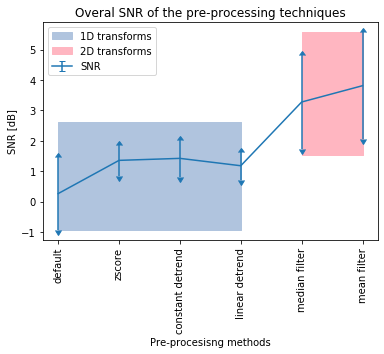

[[0.26799115 1.19766491]
 [1.36003153 0.51726606]
 [1.42584525 0.59632326]
 [1.18335787 0.45716108]
 [3.27791091 1.55118623]
 [3.81420878 1.75235638]]


In [45]:
# results = np.array(results)
methods = ['default','zscore','constant detrend', 'linear detrend', 'median filter', 'mean filter']
snr = []
for i in range(results.shape[1]):
#     print("%s:\t mean=%.3f, std=%.3f"%(methods[i],results[:,i].mean(), results[:,i].std()))
    snr.append([results[:,i].mean(), results[:,i].std()])
snr = np.array(snr)


x = np.arange(len(methods))
plt.figure()
plt.errorbar(x,snr[:,0],snr[:,1],uplims=True, lolims=True,label='SNR')
plt.xticks(x, methods, rotation='vertical')
y1 = snr[0,0].min()-snr[:4,1].max()
y2 = snr[:4,0].max()+snr[:4,1].max()
print(y1,y2)
plt.fill_between(x[:4], y1=y1,y2=y2, 
                 label='1D transforms',color='lightsteelblue')  
y1 = snr[4:,0].min()-snr[4:,1].max()
y2 = snr[4:,0].max()+snr[4:,1].max()
print(y1,y2)
plt.fill_between(x[4:], y1=y1,y2=y2, 
                 label='2D transforms',color='lightpink')  
plt.ylabel('SNR [dB]')
plt.xlabel('Pre-procesisng methods')
plt.legend()
plt.title('Overal SNR of the pre-processing techniques')
plt.show()
print(snr)